In [ ]:
import pandas as pd
import numpy as np
import cv2 as cv
import matplotlib.pyplot as plt
from matplotlib import patches
import math
%matplotlib inline

In [ ]:
file = 'Admission_Predict.csv'
data = pd.read_csv(file, sep=",")
data.head()


,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,1,337,118,4.0,4.5,4.5,9.65,1,0.92
1,2,324,107,NaN,4.0,4.5,8.87,1,0.76
2,3,316,104,NaN,3.0,3.5,8.00,1,0.72
3,4,322,110,3.0,3.5,2.5,8.67,1,0.80
4,5,314,103,2.0,2.0,3.0,8.21,0,0.65


In [ ]:
print('Количество пропущенных значений')
data.isnull().sum()

Количество пропущенных значений


Serial No.           0
GRE Score            0
TOEFL Score          0
University Rating    3
SOP                  0
LOR                  0
CGPA                 0
Research             0
Chance of Admit      0
dtype: int64

In [ ]:
data.dtypes

Serial No.             int64
GRE Score              int64
TOEFL Score            int64
University Rating    float64
SOP                  float64
LOR                  float64
CGPA                 float64
Research               int64
Chance of Admit      float64
dtype: object

In [ ]:
#Выберем числовые колонки с пропущенными значениями
#Цикл по колонкам датасета
num_cols =[]
for col in data.columns:
    temp_null_count = data[data[col].isnull()].shape[0]
    dt = str(data[col].dtype)
    if temp_null_count>0 and (dt=='float64' or dt=='int64'):
        num_cols.append(col)
        print('Колонка {}. Тип данных {}. Количество пустых значений {}.'.format(col, dt, temp_null_count))

Колонка University Rating. Тип данных float64. Количество пустых значений 3.


In [ ]:
#Возьмем столбец University Rating и заполним в нем пропуски медиальными значениями
data_num_exp = data[['University Rating']]
data_num_exp.head()

,University Rating
0,4.0
1,NaN
2,NaN
3,3.0
4,2.0


In [ ]:
from sklearn.impute import SimpleImputer
from sklearn.impute import MissingIndicator
indicator = MissingIndicator()
mask_missing_values_only = indicator.fit_transform(data_num_exp)
strategies=['mean', 'median', 'most_frequent']

In [ ]:
def test_num_impute(strategy_param):
    imp_num = SimpleImputer(strategy=strategy_param)
    data_num_imp = imp_num.fit_transform(data_num_exp)
    return data_num_imp[mask_missing_values_only]
    

In [ ]:
strategies[1], test_num_impute(strategies[1])

('median', array([3., 3., 3.]))

In [ ]:
#Возьмем другой датасет и определим количество категориальных признаков
file1 = 'toy_dataset.csv'
data1 = pd.read_csv(file1, sep=",")
data1.head()

,Number,City,Gender,Age,Income,Illness
0,1,Dallas,Male,41,40367.0,No
1,2,Dallas,NaN,54,45084.0,No
2,3,Dallas,Male,42,52483.0,No
3,4,Dallas,Male,40,40941.0,No
4,5,Dallas,Male,46,50289.0,No


In [ ]:
print('Количество пропущенных значений')
data1.isnull().sum()


Количество пропущенных значений


Number     0
City       0
Gender     4
Age        0
Income     0
Illness    0
dtype: int64

In [ ]:
data1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150000 entries, 0 to 149999
Data columns (total 6 columns):
 #   Column   Non-Null Count   Dtype  
---  ------   --------------   -----  
 0   Number   150000 non-null  int64  
 1   City     150000 non-null  object 
 2   Gender   149996 non-null  object 
 3   Age      150000 non-null  int64  
 4   Income   150000 non-null  float64
 5   Illness  150000 non-null  object 
dtypes: float64(1), int64(2), object(3)
memory usage: 6.9+ MB


In [ ]:
cat_cols = []
for col in data1.columns:
  #Количество пустых значений
  temp_null_count = data1[data1[col].isnull()].shape[0]
  dt = str(data1[col].dtype)
  if temp_null_count>0 and (dt=='object'):
      num_cols.append(col)
      print('Колонка {}. Тип данных {}. Количество пустых значений {}.'.format(col, dt, temp_null_count))

Колонка Gender. Тип данных object. Количество пустых значений 4.


In [ ]:
#Возьмем столбец Gender и заполним его наиболее частыми значениями.
cat_temp_data1 = data1[['Gender']]
cat_temp_data1.head()

,Gender
0,Male
1,NaN
2,Male
3,Male
4,Male


In [ ]:
imp2 = SimpleImputer(missing_values=np.nan, strategy='most_frequent')
data1_imp2 = imp2.fit_transform(cat_temp_data1)
data1_imp2

array([['Male'],
       ['Male'],
       ['Male'],
       ...,
       ['Male'],
       ['Male'],
       ['Female']], dtype=object)

<Axes: xlabel='Chance of Admit '>

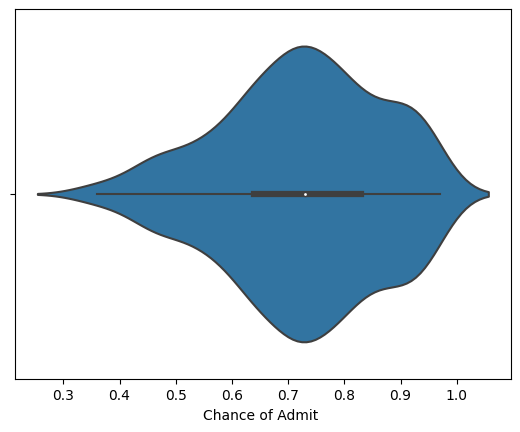

In [ ]:
#Для дальнейшего построения моделей машинного обучения можно взять признаки: GRE Score, TOEFL Score, University Rating, SOP, LOR, CGPA, Chance of Admit 
sns.violinplot(x=data['Chance of Admit '])